# Create Tracking Sheet by Type

In [3]:
import numpy as np
import pandas as pd

In [4]:
np.log(0.565)

-0.5709295478356962

In [5]:
tracking = pd.read_csv('../tracking/tracking.csv')

In [6]:
tracking.head()

,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,model_type,training_time,n_features,depth,gml_oof_score,oof_score,lb_score,1JHC_mae_cv,2JHH_mae_cv,1JHN_mae_cv,2JHN_mae_cv,2JHC_mae_cv,3JHH_mae_cv,3JHC_mae_cv,3JHN_mae_cv,1JHC_std_mae_cv,2JHH_std_mae_cv,1JHN_std_mae_cv,2JHN_std_mae_cv,2JHC_std_mae_cv,3JHH_std_mae_cv,3JHC_std_mae_cv,3JHN_std_mae_cv,1JHC_tr_sec_f1,1JHC_pred_sec_f1,1JHC_tr_sec_f2,1JHC_pred_sec_f2,2JHH_tr_sec_f1,2JHH_pred_sec_f1,2JHH_tr_sec_f2,2JHH_pred_sec_f2,1JHN_tr_sec_f1,1JHN_pred_sec_f1,1JHN_tr_sec_f2,1JHN_pred_sec_f2,2JHN_tr_sec_f1,2JHN_pred_sec_f1,2JHN_tr_sec_f2,2JHN_pred_sec_f2,2JHC_tr_sec_f1,2JHC_pred_sec_f1,2JHC_tr_sec_f2,2JHC_pred_sec_f2,3JHH_tr_sec_f1,3JHH_pred_sec_f1,3JHH_tr_sec_f2,3JHH_pred_sec_f2,3JHC_tr_sec_f1,3JHC_pred_sec_f1,3JHC_tr_sec_f2,3JHC_pred_sec_f2,3JHN_tr_sec_f1,3JHN_pred_sec_f1,3JHN_tr_sec_f2,3JHN_pred_sec_f2,1JHC_csv_save_sec,2JHH_csv_save_sec,1JHN_csv_save_sec,2JHN_csv_save_sec,2JHC_csv_save_sec,3JHH_csv_save_sec,3JHC_csv_save_sec,3JHN_csv_save_sec,1JHC_tr_sec_f3,1JHC_pred_sec_f3,2JHH_tr_sec_f3,2JHH_pred_sec_f3,1JHN_tr_sec_f3,1JHN_pred_sec_f3,2JHN_tr_sec_f3,2JHN_pred_sec_f3,3JHH_tr_sec_f3,3JHH_pred_sec_f3,2JHC_tr_sec_f3,2JHC_pred_sec_f3,3JHC_tr_sec_f3,3JHC_pred_sec_f3,3JHN_tr_sec_f3,3JHN_pred_sec_f3,2JHN_f1_best_iter,2JHN_f2_best_iter,1JHN_f1_best_iter,1JHN_f2_best_iter,3JHN_f1_best_iter,3JHN_f2_best_iter,2JHH_f1_best_iter,2JHH_f2_best_iter,3JHH_f1_best_iter,3JHH_f2_best_iter,1JHC_f1_best_iter,1JHC_f2_best_iter,2JHC_f1_best_iter,2JHC_f2_best_iter,3JHC_f1_best_iter,3JHC_f2_best_iter,2JHNcv_f1,2JHNcv_f2,3JHNcv_f1,3JHNcv_f2,2JHCcv_f1,2JHCcv_f2,3JHCcv_f1,3JHCcv_f2,2JHHcv_f1,2JHHcv_f2,1JHNcv_f1,1JHNcv_f2
0,0610_1341,M010,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,NaN,61.0,NaN,NaN,0.9210,-0.452,1.9206,0.4542,1.0336,0.5335,0.8405,0.5699,0.8593,0.3264,0.00388,0.00112,0.00945,0.00394,0.00131,0.00149,0.00279,0.00184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0611_0308,M012,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,NaN,28.0,NaN,NaN,1.0109,-0.202,1.8632,0.4782,0.9773,0.5826,1.0352,0.6167,0.9867,0.3553,0.00415,0.00060,0.01524,0.00399,0.00435,0.00285,0.00162,0.00088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0611_1250,M013,mae,50000.0,500.0,529.0,32.0,0.5,5.0,catboost,137353.19,28.0,NaN,NaN,0.9488,NaN,1.7478,0.4442,1.0337,0.5300,0.9603,0.5761,0.9359,0.3300,0.00485,0.00293,0.01892,0.00264,0.00330,0.00167,0.00182,0.00202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0611_1249,M014,mae,500000.0,500.0,529.0,24.0,0.3,5.0,NaN,NaN,28.0,NaN,NaN,0.9142,-0.275,1.7005,0.4378,0.8751,0.5070,0.9209,0.5596,0.8967,0.3167,0.00432,0.00156,0.01019,0.00536,0.00292,0.00243,0.00197,0.00191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0613_0402,M015,mae,500000.0,500.0,529.0,24.0,0.3,5.0,NaN,NaN,51.0,NaN,NaN,0.

In [89]:
types = ['2JHN', '3JHN', '2JHC', '3JHC', '2JHH', '1JHN', '3JHH', '1JHC']
for t in types:
    print(t)
    base_cols = ['run_id',
                 'model_number',
                 'eval_metric',
                 'n_estimators',
                 'early_stopping_rounds',
                 'random_state',
                 'n_threads',
                 'learning_rate',
                 'n_fold',
                 'model_type',
                 'training_time',
                 'n_features',
                 'depth',
                 'gml_oof_score',
                 'oof_score',
                 'lb_score',]
    t_cols = [x for x in tracking.columns if t in x]
    print(t_cols)
    t_filtered = tracking[base_cols + t_cols]
    t_filtered = t_filtered.dropna(subset=[f'{t}_mae_cv']).sort_values(f'{t}_mae_cv')
    sec_cols = [x for x in t_filtered.columns if 'sec' in x]
    for s in sec_cols:
        t_filtered[s.replace('sec','hour')] = (t_filtered[s] / 60 / 60).round(4)
    t_filtered = t_filtered.drop(sec_cols, axis=1)
    t_filtered[f'{t}_logmae_cv'] = t_filtered[f'{t}_mae_cv'].apply(np.log).round(5)
    t_filtered = t_filtered.round(5)
    hour_cols = [x for x in t_filtered if 'hour' in x]
    t_filtered['hours_total'] = t_filtered[hour_cols].sum(axis=1)
    collist = [x for x in t_filtered.columns]
    first_cols = ['run_id','model_number','learning_rate','n_fold','eval_metric','n_features','random_state','hours_total',f'{t}_mae_cv',f'{t}_logmae_cv','oof_score','gml_oof_score','lb_score']

    _ = [collist.remove(x) for x in first_cols]
    new_collist = first_cols + collist
    t_filtered = t_filtered[new_collist]
    
    t_filtered['n_estimators'] = t_filtered['n_estimators'].astype(int)
    t_filtered['early_stopping_rounds'] = t_filtered['early_stopping_rounds'].astype(int)
    t_filtered['n_threads'] = t_filtered['n_threads'].astype(int)
    t_filtered['n_features'] = t_filtered['n_features'].astype(int)
    t_filtered['random_state'] = t_filtered['random_state'].astype(int)
    t_filtered['n_fold'] = t_filtered['n_fold'].astype(int)

    t_filtered.to_csv(f'../tracking/tracking_{t}.csv', index=False, float_format='%.4f')

2JHN
['2JHN_mae_cv', '2JHN_std_mae_cv', '2JHN_tr_sec_f1', '2JHN_pred_sec_f1', '2JHN_tr_sec_f2', '2JHN_pred_sec_f2', '2JHN_csv_save_sec', '2JHN_tr_sec_f3', '2JHN_pred_sec_f3', '2JHN_f1_best_iter', '2JHN_f2_best_iter', '2JHNcv_f1', '2JHNcv_f2']
3JHN
['3JHN_mae_cv', '3JHN_std_mae_cv', '3JHN_tr_sec_f1', '3JHN_pred_sec_f1', '3JHN_tr_sec_f2', '3JHN_pred_sec_f2', '3JHN_csv_save_sec', '3JHN_tr_sec_f3', '3JHN_pred_sec_f3', '3JHN_f1_best_iter', '3JHN_f2_best_iter', '3JHNcv_f1', '3JHNcv_f2']
2JHC
['2JHC_mae_cv', '2JHC_std_mae_cv', '2JHC_tr_sec_f1', '2JHC_pred_sec_f1', '2JHC_tr_sec_f2', '2JHC_pred_sec_f2', '2JHC_csv_save_sec', '2JHC_tr_sec_f3', '2JHC_pred_sec_f3', '2JHC_f1_best_iter', '2JHC_f2_best_iter', '2JHCcv_f1', '2JHCcv_f2']
3JHC
['3JHC_mae_cv', '3JHC_std_mae_cv', '3JHC_tr_sec_f1', '3JHC_pred_sec_f1', '3JHC_tr_sec_f2', '3JHC_pred_sec_f2', '3JHC_csv_save_sec', '3JHC_tr_sec_f3', '3JHC_pred_sec_f3', '3JHC_f1_best_iter', '3JHC_f2_best_iter', '3JHCcv_f1', '3JHCcv_f2']
2JHH
['2JHH_mae_cv', '2JHH_s

In [90]:
train = pd.read_csv('../input/train.csv')

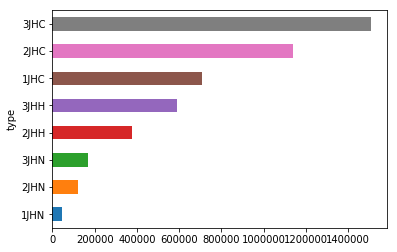

In [93]:
train.groupby('type')['id'].count().sort_values().plot(kind='barh')

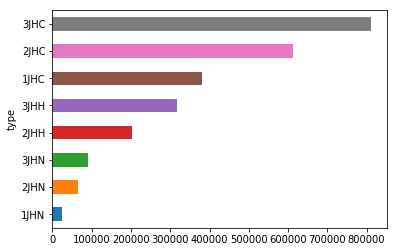

In [94]:
test = pd.read_csv('../input/test.csv')
test.groupby('type')['id'].count().sort_values().plot(kind='barh')